In [1]:
import pandas as pd
df = pd.read_csv('/mnt/data1/jcxu/lattice-sum/output/searchsum - large.csv')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
# plt.rcParams["figure.figsize"] = (5,2.2)
model = 'Model'
bs = 'k'
df = df.rename(columns={"model": model, "beam_size": bs})
# models = df[model].values.tolist()
# newmodels = []
# for x in models:
#     if x =='bs':
#         newmodels.append('BS')
#     else:
#         newmodels.append('DBS')
# models = newmodels
# cpname = 'Set2'
cpname = 'colorblind'
colors = sns.color_palette(cpname,8)
print(colors)
our_color = colors[0]
bfs_color = colors[6]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), (0.8352941176470589, 0.3686274509803922, 0.0), (0.8, 0.47058823529411764, 0.7372549019607844), (0.792156862745098, 0.5686274509803921, 0.3803921568627451), (0.984313725490196, 0.6862745098039216, 0.8941176470588236), (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]


In [11]:
print(df)

   idx task dataset Model    k  max_len  ngram_suffix  len_diff merge  \
0    0  sum    xsum    BS   16       35             4         5   zip   
1    1  sum    xsum   DBS   16       35             4         5   zip   
2    2  sum    xsum    BS   32       35             4         5   zip   
3    3  sum    xsum   DBS   32       35             4         5   zip   
4    4  sum    xsum    BS   64       35             4         5   zip   
5    5  sum    xsum   DBS   64       35             4         5   zip   
6    6  sum    xsum    BS  128       35             4         5   zip   
7    7  sum    xsum   DBS  128       35             4         5   zip   

   post_ratio  ...  buck_10_SELF_BLEU  buck_1000_SELF_BLEU  \
0         0.4  ...             0.9901                    0   
1         0.4  ...             1.9802                    0   
2         0.4  ...             0.9901                    0   
3         0.4  ...             4.9505                    0   
4         0.4  ...             1

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

/mnt/data1/jcxu/lattice-sum/notebooks


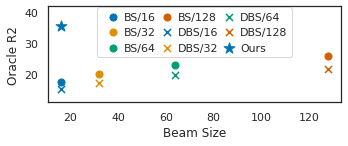

In [26]:
fig, ax = plt.subplots(figsize=(5,2.2))
legends = []
for model_name in ['BS', 'DBS']:
  for idx, k in enumerate([16,32,64,128]) :
    # a = df[df[model] ==model_name]
    b = df[df[bs] == k]
    b = b[b[model] == model_name]
    # print(b)
    v = b['or2']
    if model_name == 'BS':
      marker = 'o'
    else:
      marker = 'x'
    plt.scatter(k, v, c=colors[idx], marker=marker, label=f"{model_name}/{k}",s=50)
    legends.append(f"{model_name}/{k}")
plt.scatter(16, 35.8, c=colors[0], marker='*', label=f"Ours",s=130)
plt.legend(ncol=3,handletextpad=0.,borderaxespad =0.1,columnspacing=0)
ax.set_xlabel('Beam Size')
ax.set_ylabel('Oracle R2')
ax.set_ylim(top=42,bottom=11)

fig.tight_layout()
# plt.show()
import os
print(os.getcwd())

plt.savefig('large_beam.pdf')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/mnt/data1/jcxu/lattice-sum/notebooks


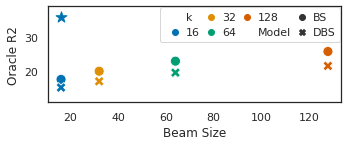

In [2]:
keya = bs
keyb = 'or2'
fig, ax = plt.subplots(figsize=(5,2.2))

# ax.fill_between([0,525],[9,9],[13,13],alpha=0.2)
sns.scatterplot(x=keya, y=keyb,
                hue=bs, style=model,s=100,
                # marker="model",
                # palette="ch:r=-.2,d=.3_r",
                # hue_order=clarity_ranking,
                # sizes=(1, 8), linewidth=0,
                data=df, ax=ax, palette=cpname)
# ax.legend(ncol=2)
ax.set_ylim(top=39,bottom=11)
# ax.set_xlim(left=0,right=525)
ax.legend( ncol=4,handletextpad=0.,borderaxespad =0.1,columnspacing=0)
ax.set_xlabel('Beam Size')
ax.set_ylabel('Oracle R2')
plt.scatter(x=16,y=35.8,c=our_color,marker='*',s=130)


fig.tight_layout()
# plt.show()
import os
print(os.getcwd())

plt.savefig('large_beam.pdf')


/mnt/data1/jcxu/lattice-sum/notebooks


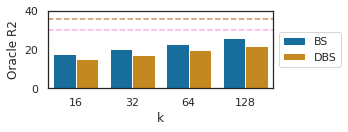

In [165]:

fig, ax = plt.subplots(figsize=(5,2))
ax = sns.barplot(
    data=df, 
    x=bs, y="or2", hue=model,palette=cpname
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Oracle R2')
ax.set_ylim(top=40)
# plt.axhline(y=0.317)
# plt.annotate("RcbBFS (ours, 16)",(0.5,30),c=our_color)
plt.axhline(y=35.8, linestyle='--', c=our_color)
# plt.axhline(y=30.1, linestyle='--', c=bfs_color)
# plt.annotate("RcbBFS (ours, 16)",(0.5,25),c=our_color)

fig.tight_layout()
# plt.show()
import os
print(os.getcwd())
plt.savefig('large_beam.pdf')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/mnt/data1/jcxu/lattice-sum/notebooks


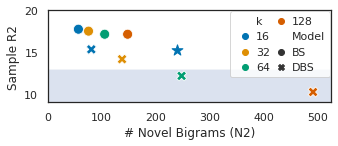

In [20]:
keya = 'novel_2gram'
keyb = 'sr2'
fig, ax = plt.subplots(figsize=(5,2.2))

ax.fill_between([0,525],[9,9],[13,13],alpha=0.2)
sns.scatterplot(x=keya, y=keyb,
                hue=bs, style=model,s=100,
                # marker="model",
                # palette="ch:r=-.2,d=.3_r",
                # hue_order=clarity_ranking,
                # sizes=(1, 8), linewidth=0,
                data=df, ax=ax, palette=cpname)
# ax.legend(ncol=2)
ax.set_ylim(top=20,bottom=9)
ax.set_xlim(left=0,right=525)
ax.legend(loc='upper right', ncol=2,handletextpad=0.,borderaxespad =0.1,columnspacing=0)
ax.set_xlabel('# Novel Bigrams (N2)')
ax.set_ylabel('Sample R2')
plt.scatter(x=239,y=15.2,c=our_color,marker='*',s=130)
# plt.scatter(x=167,y=15.6,c=bfs_color,marker='*',s=130)

fig.tight_layout()
# plt.show()
import os
print(os.getcwd())

plt.savefig('large_bad_beam.pdf')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

/mnt/data1/jcxu/lattice-sum/notebooks


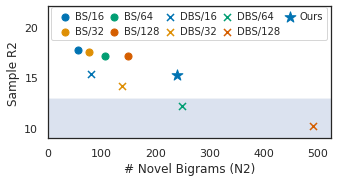

In [56]:
fig, ax = plt.subplots(figsize=(5,2.7))

ax.set_ylim(top=22,bottom=9)
ax.set_xlim(left=0,right=525)
ax.fill_between([0,525],[9,9],[13,13],alpha=0.2)


keya = 'novel_2gram'
keyb = 'sr2'
for model_name in ['BS', 'DBS']:
  for idx, k in enumerate([16,32,64,128]) :
    # a = df[df[model] ==model_name]
    b = df[df[bs] == k]
    b = b[b[model] == model_name]

    if model_name == 'BS':
      marker = 'o'
    else:
      marker = 'x'
    plt.scatter(b[keya], b[keyb], c=colors[idx], marker=marker, label=f"{model_name}/{k}",s=50)
    legends.append(f"{model_name}/{k}")
plt.scatter(239, 15.2, c=colors[0], marker='*', label=f"Ours", s=130)
plt.legend(ncol=5,handletextpad=0.,borderaxespad =0.1,columnspacing=0,loc='upper center',fontsize='small')
ax.set_xlabel('# Novel Bigrams (N2)')
ax.set_ylabel('Sample R2')
# ax.set_ylim(top=42,bottom=11)

fig.tight_layout()
# plt.show()
import os
print(os.getcwd())

plt.savefig('large_bad_beam.pdf')
